In [ ]:
!pip install researchpy
!pip install pingouin

     |████████████████████████████████| 204kB 14.9MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.11-cp37-none-any.whl size=203325 sha256=55260ba0161e93333c8238d9214a5699ee50cd46ce597e5df1787a9583d0d4b4
  Stored in directory: /root/.cache/pip/wheels/79/46/ef/e377eb45c86f278f660d31c4a30e3f733063d28c89462f1aea
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=2c0aa2a131719f91c376b7c30f83b8abcfa344a77fb7bfe7869fdbb05ccd9b35
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats  import chi2_contingency
import researchpy as rp
from scipy import stats
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import pingouin as pg
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# DATA PREPARATION

In [ ]:
df=pd.read_excel(r"Exercise Survey (Responses).xlsx")
df

,Name,Gender,Age,Employment_status,Weight,Height,Health_issues,Frequency_of_exercise,Time_spent_on_exercise,Preferences_of_exercising,What_do_you_most_often_do_for_exercise?,Pattern_of_exercising,Hurdles_for_exercising,Expenditure_before,Expenditure_after,Opinion_on_exercise_time,Exercise_plans_during_lockdown,Average_calories_burnt_in_last_month,Intentions_after_lockdown,Frequency_of_breathing_exercise,Key_goal,Level_of_fitness,BMI,Category
0,Viraj,Male,20,Unemployed,50,170,No,Rarely,45,Independent workout,Play team sports,Exercising in group,Academic pressure,0,0,Yes,Yes,2729,Increase physical activity,1 day,Increasing energy,7,17.301038,Underweight
1,Prashant,Male,48,Self Employed,72,168,No,Weekly,45,Independent workout,"Walk, Play team sports",Exercising in group,Lack of time,0,0,Yes,Yes,2971,Keeping it same,3 days,Looking fit,9,25.510204,Overweight
2,Pranali,Female,45,Salaried Employee,68,162,No,I don't,30,Independent workout,Walk,Exercising alone.,Lack of time,500,300,Yes,No,1465,Increase physical activity,Never,Increasing muscular strength,8,25.910684,Overweight
3,Shashikant,Male,70,Self Employed,75,162,Yes,Rarely,30,Independent workout,Walk,Exercising alone.,Lack of time,0,0,Yes,No,1744,Increase physical activity,1 day,Looking fit,9,28.577961,Overweight
4,Yogesh,Male,21,Unemployed,54,171,No,Weekly,60,Independent workout,"Lift Weight, Walk, Aerobics, Play team sports,...",Exercising in group,Academic pressure,2000,1500,Yes,Yes,4702,Keeping it same,3 days,Increasing energy,7,18.467221,Underweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Khushbu,Female,31,Salaried Employee,73,173,No,Daily,30,Independent workout,Outdoor sports/Cycling,Exercising with trainer,Health issues/concerns,4500,2500,No,No,1308,Keeping it same,5 days,Looking fit,9,24.391059,Healthy
146,Palak,Female,22,Salaried Employee,65,161,No,Rarely,90,Classes,Aerobics/ Yoga Classes,Exercising in group,Lack of time,3000,2500,Yes,Yes,5561,Increase physical activity,1 day,Increasing muscular strength,8,25.076193,Overweight
147,Manish,Male,15,Unemployed,42,158,No,Weekly,45,Independent workout,Gym Workout,Exercising with trainer,Academic pressure,2400,1200,Maybe,No,2917,Keeping it same,3 days,Increasing energy,6,16.824227,Underweight
148,Vaibhav,Male,28,Salaried Employee,53,164,No,Rarely,60,Independent workout,Walk/Jog,Exercising alone.,Other commitments/responsibilities,2700,1400,No,Yes,4944,Increase physical activity,1 day,Increasing energy,8,19.705532,Healthy


In [ ]:
df.describe()

,Age,Weight,Height,Time_spent_on_exercise,Expenditure_before,Expenditure_after,Average_calories_burnt_in_last_month,Level_of_fitness,BMI
count,150.000000,150.000000,150.000000,150.00000,150.00000,150.000000,150.000000,150.000000,150.000000
mean,28.980000,63.573333,162.993333,51.10000,3814.00000,2273.666667,3277.806667,7.846667,23.842049
std,12.387735,16.078810,10.240397,14.75607,2735.96553,1751.659775,1360.807995,1.151227,5.438416
min,11.000000,30.000000,125.000000,30.00000,0.00000,0.000000,1002.000000,5.000000,14.659928
25%,19.000000,51.000000,160.000000,45.00000,2000.00000,900.000000,2281.250000,7.000000,19.713143
50%,26.000000,65.000000,165.000000,45.00000,3000.00000,2000.000000,2882.500000,8.000000,24.157212
75%,37.000000,76.000000,169.000000,60.00000,5000.00000,3000.000000,4381.250000,9.000000,27.670259
max,70.000000,120.000000,181.000000,90.00000,15000.00000,8000.000000,6876.000000,10.000000,42.330559


In [67]:
df.columns

Index(['Name', 'Gender', 'Age', 'Employment_status', 'Weight', 'Height',
       'Health_issues', 'Frequency_of_exercise', 'Time_spent_on_exercise',
       'Preferences_of_exercising', 'What_do_you_most_often_do_for_exercise?',
       'Pattern_of_exercising', 'Hurdles_for_exercising', 'Expenditure_before',
       'Expenditure_after', 'Opinion_on_exercise_time',
       'Exercise_plans_during_lockdown',
       'Average_calories_burnt_in_last_month', 'Intentions_after_lockdown',
       'Frequency_of_breathing_exercise', 'Key_goal', 'Level_of_fitness',
       'BMI', 'Category'],
      dtype='object')

In [ ]:
df.info()

In [69]:
df.isnull().sum()

Name                                       0
Gender                                     0
Age                                        0
Employment_status                          0
Weight                                     0
Height                                     0
Health_issues                              0
Frequency_of_exercise                      0
Time_spent_on_exercise                     0
Preferences_of_exercising                  0
What_do_you_most_often_do_for_exercise?    0
Pattern_of_exercising                      0
Hurdles_for_exercising                     0
Expenditure_before                         0
Expenditure_after                          0
Opinion_on_exercise_time                   0
Exercise_plans_during_lockdown             0
Average_calories_burnt_in_last_month       0
Intentions_after_lockdown                  0
Frequency_of_breathing_exercise            0
Key_goal                                   0
Level_of_fitness                           0
BMI       

In [ ]:
Male= df[df['Gender']== 'Male']
Female=df[df['Gender']== 'Female']

In [ ]:
Unemployed= df[df['Employment_status']== 'Unemployed']
Self_employed= df[df['Employment_status']== 'Self Employed']
Salaried_employee= df[df['Employment_status']== 'Salaried Employee']

In [76]:
Men = Salaried_employee[(Salaried_employee['Gender'] == 'Male')]
Men.reset_index(inplace= True)

Women = Salaried_employee[(Salaried_employee['Gender'] == 'Female')]
Women.reset_index(inplace= True)

#  CHI-SQUARE TEST


# 1.CHI-SQAURE TEST OF INDEENDENCE/ ASSOCIATION

#1

### Hypothesis
* H0:- There is no significant difference between BMI category of salaried people and their frequency of exercise ( independent )

* H1:- There is significant difference between BMI category of salaried people and their frequency of exercise ( dependent )

In [ ]:
table, results = rp.crosstab(Salaried_employee['Category'], Salaried_employee['Frequency_of_exercise'], test= 'chi-square') #,prop='row')    
table

Frequency_of_exercise                          
Frequency_of_exercise                 Daily I don't Rarely Weekly All
Category                                                             
Healthy                                   8       0      5     14  27
Obese                                     0       3      3      4  10
Overweight                               12       3     10      5  30
Underweight                               1       0      4      0   5
All                                      21       6     22     23  72

In [ ]:
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,25.3694
1,p-value =,0.0026
2,Cramer's V =,0.3427


### Conclusion
* There is significant difference between the BMI category of salaried people and their frequency of exercise ( dependent )

#2

### Hypothesis
* H0:- There is no significant difference between time spent on exercise and level of fitness ( independent )

* H1:- There is significant difference between time spent on exercise and level of fitness ( dependent )

In [56]:
table, results = rp.crosstab(Salaried_employee['Time_spent_on_exercise'], Salaried_employee['Level_of_fitness'], test= 'chi-square') #,prop='row')
table

Level_of_fitness                      
Level_of_fitness                      5  6   7   8   9 10 All
Time_spent_on_exercise                                       
30                                    0  4   1   4   2  0  11
45                                    0  2   9  13   7  0  31
60                                    1  0   2   9  11  1  24
90                                    0  0   0   4   2  0   6
All                                   1  6  12  30  22  1  72

In [57]:
results

,Chi-square test,results
0,Pearson Chi-square ( 15.0) =,26.3455
1,p-value =,0.0345
2,Cramer's V =,0.3492


### Conclusion
* There is significant difference between the BMI category of salaried people and frequency of exercise ( dependent )

# 2. CHI-SQUARE TEST OF HOMOGEINITY

#1

### Hypothesis
* H0:- There is no significant difference between time spent on exercise and hurdles for exercising ( independent )

* H1:- There is significant difference between time spent on exercise and hurdles for exercising ( dependent )

In [ ]:
table, results = rp.crosstab(Salaried_employee['Time_spent_on_exercise'], Salaried_employee['Hurdles_for_exercising'], test= 'chi-square') #,prop='row')  
table

Hurdles_for_exercising  ...    
Hurdles_for_exercising      Academic pressure  ... All
Time_spent_on_exercise                         ...    
30                                          2  ...  11
45                                          1  ...  31
60                                          0  ...  24
90                                          0  ...   6
All                                         3  ...  72

[5 rows x 7 columns]

In [ ]:
results

,Chi-square test,results
0,Pearson Chi-square ( 15.0) =,31.0061
1,p-value =,0.0088
2,Cramer's V =,0.3789


### Conclusion
* There is significant difference between the BMI category of salaried people and frequency of exercise ( dependent )

# T-TEST

## 1. ONE SAMPLE T-TEST

# 1

### Hypothesis
* H0:- There is no significant difference between average calories burnt in last month ( independent )

* H1:- There is significant difference between average calories burnt in last month  ( dependent )

In [ ]:
from scipy.stats  import ttest_ind,ttest_1samp,ttest_rel
Time=df['Average_calories_burnt_in_last_month']
ttest_1samp(Time,3277)

Ttest_1sampResult(statistic=0.007260104781308798, pvalue=0.994217036744689)

### Conclusion
* There is is no significant difference between average calories burnt in last month (dependent)

#2

### Hypothesis
H0:- There is no significant difference in level of fitness ( independent )

H1:- There is significant difference difference in level of fitness ( dependent )

In [60]:
Fitness_level=df['Level_of_fitness']
ttest_1samp(Fitness_level,7.84)

Ttest_1sampResult(statistic=0.0709240089823861, pvalue=0.9435533404732818)

### Conclusion
* There is no significant difference in level of fitness ( independent )

# 2.TWO SAMPLE T-TEST

# 1

### Hypothesis
* H0:- There is no significant difference between male BMI and female BMI of salried employee category ( independent )

* H1:- There is significant difference between male BMI and female BMI of salried employee category ( dependent )

In [70]:
import scipy
twosample_results = scipy.stats.ttest_ind(Men['BMI'],Women['BMI'])
twosample_results

Ttest_indResult(statistic=0.43761035405740245, pvalue=0.6630160442397591)

### Conclusion
* There is  is significant difference between male BMI and female BMI of of salried employee category( dependent).

#2

## Hypothesis
* H0:- There is no significant difference between average calories burnt in last month and time spent on exercise by males of salaried employee category. ( independent )

* H1:- There is significant difference between verage calories burnt in last month and time spent on exercise by males of salaried employee category. ( dependent )

In [63]:
import scipy
twosample_results = scipy.stats.ttest_ind(Men['Average_calories_burnt_in_last_month'],Men['Time_spent_on_exercise'])
twosample_results

Ttest_indResult(statistic=13.576622138262675, pvalue=1.6471719766341657e-20)

### Conclusion
* There is There is significant difference between verage calories burnt in last month and time spent on exercise by males of salaried employee category. ( dependent )

#3

### Hypothesis
* H0:- There is no significant difference between average calories burnt in last month and time spent on exercise by females of salaried employee category. ( independent )

* H1:- There is significant difference between verage calories burnt in last month and time spent on exercise by females of salaried employee category. ( dependent )

In [ ]:
import scipy
twosample_results = scipy.stats.ttest_ind(Women['Average_calories_burnt_in_last_month'],Women['Time_spent_on_exercise'])
twosample_results

### Conclusion
* There is There is significant difference between verage calories burnt in last month and time spent on exercise by females of salaried employee category. ( dependent )

# 3. PAIRED SAMPLE T-TEST

## 1

### Hypothesis
* H0:- There is no significant difference between expenditure before and after lockdown by males of salaried employee category( independent )

* H1:- There is significant difference between expenditure before and after lockdown by males salaried employee category ( dependent )

In [73]:
from scipy.stats  import ttest_ind,ttest_1samp,ttest_rel
a=Men['Expenditure_before']
b=Men['Expenditure_after']
ttest_rel(a,b)

Ttest_relResult(statistic=12.026433434238449, pvalue=2.0689857486166663e-13)

### Conclusion
* There is significant difference between expenditure before and after lockdown by males of salaried employee category ( dependent )

#2

### Hypothesis
* H0:- There is no significant difference between expenditure before and after lockdown by females of salaried employee category( independent )

* H1:- There is significant difference between expenditure before and after lockdown by females of salaried employee category ( dependent )

In [75]:
from scipy.stats  import ttest_ind,ttest_1samp,ttest_rel
a=Women['Expenditure_before']
b=Women['Expenditure_after']
ttest_rel(a,b)

Ttest_relResult(statistic=6.902802045903792, pvalue=3.329953634398286e-08)

### Conclusion
* There is significant difference between expenditure before and after lockdown by females of salaried employee category ( dependent )

# ONE WAY ANOVA

# 1

The purpose of this study was to test for a difference between the BMI of people from different employment status.

H0:- There is no significance difference between the BMI of people from all employment status.
Vs

H1:- There is significance difference between the BMI of people from all employment status.

In [ ]:
aov = pg.anova(data=df, dv='BMI', between='Employment_status', detailed=True)
print(aov)

              Source           SS   DF  ...          F     p-unc       np2
0  Employment_status   647.608644    2  ...  12.661827  0.000008  0.146954
1             Within  3759.270690  147  ...        NaN       NaN       NaN

[2 rows x 7 columns]


In [ ]:
stats.f_oneway(df['Level_of_fitness'][df['Employment_status'] == 'Salaried Employee'],
               df['Level_of_fitness'][df['Employment_status'] == 'Self Employed'],
               df['Level_of_fitness'][df['Employment_status'] == 'Unemployed'])

F_onewayResult(statistic=2.0876679053815286, pvalue=0.12763649440853847)

### Conclusion
There is no significance difference between the  BMI of people from all employment status.

## Assumptions of ANOVA

### Levene Test
it is used to check the equality of Variance between the Brand ( Treatment) or Homogeneity of Variance

H0:- There is no significance difference between the BMI of people from all employment status.
Vs

H1:- There is significance difference between the BMI of people from all employment status.

In [ ]:
stats.levene(df['Level_of_fitness'][df['Employment_status'] == 'Salaried Employee'],
               df['Level_of_fitness'][df['Employment_status'] == 'Self Employed'],
               df['Level_of_fitness'][df['Employment_status'] == 'Unemployed'])

LeveneResult(statistic=1.634024076356026, pvalue=0.1986669712211215)

### Conclusion
There is no significance difference between the  BMI of people from all employment status.

In [ ]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df['BMI'], df['Employment_status'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Salaried Employee,Self Employed,0.1815,0.9,-2.4854,2.8484,False
Salaried Employee,Unemployed,-4.3547,0.001,-6.559,-2.1503,True
Self Employed,Unemployed,-4.5362,0.001,-7.3626,-1.7098,True


# 2

The purpose of this study was to test for a difference between the BMI of people from different employment status.

H0:- There is no significance difference between the BMI of people from salaried employees with respect to gender.


H1:- There is significance difference between the BMI of people from salaried employees with respect to gender.

In [ ]:
aov = pg.anova(data=Salaried_employee, dv='BMI', between='Gender', detailed=True)
print(aov)

In [ ]:
stats.f_oneway(Salaried_employee['BMI'][Salaried_employee['Gender'] == 'Male'],
               Salaried_employee['BMI'][Salaried_employee['Gender'] == 'Female'])

F_onewayResult(statistic=0.19150282197824517, pvalue=0.6630160442397566)

Conclusion

There is no significance difference between the BMI of people from salaried employees with respect to gender

Levene Test

It is used to check the equality of Variance between the Brand ( Treatment) or Homogeneity of Variance

H0:- There is no significance difference between the BMI of people from salaried employees with respect to gender.


H1:- There is significance difference between the BMI of people from salaried employees with respect to gender.

In [ ]:
stats.levene(Salaried_employee['BMI'][Salaried_employee['Gender'] == 'Male'],
               Salaried_employee['BMI'][Salaried_employee['Gender'] == 'Female'])

LeveneResult(statistic=0.020460189694921856, pvalue=0.8866702361028339)

In [ ]:
comp = mc.MultiComparison(df['BMI'], df['Employment Status'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Salaried Employee,Self Employed,0.1815,0.9,-2.4854,2.8484,False
Salaried Employee,Unemployed,-4.3547,0.001,-6.559,-2.1503,True
Self Employed,Unemployed,-4.5362,0.001,-7.3626,-1.7098,True


# Linear Regression

#1

### Hypothesis
* H0 : - There is no relationship between the weight & BMI.

* H1 : -There is  relationship between the weight & BMI.

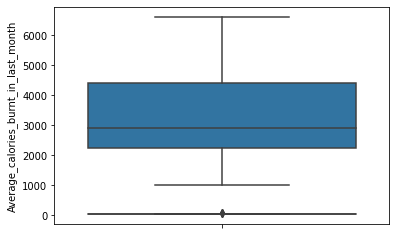

In [66]:
#Treatment of outlier
sns.boxplot(y='Time_spent_on_exercise',data=Salaried_employee)
sns.boxplot(y='Average_calories_burnt_in_last_month',data=Salaried_employee)

In [ ]:
# Data Partition
x=Salaried_employee[['Time_spent_on_exercise']]
y=Salaried_employee[['Average_calories_burnt_in_last_month']]
X_train, X_test, y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [ ]:
train = pd.concat([X_train,y_train], axis=1)
train.head()

,Time_spent_on_exercise,Average_calories_burnt_in_last_month
36,45,2197
21,45,2703
14,60,4383
78,45,2783
63,60,4909


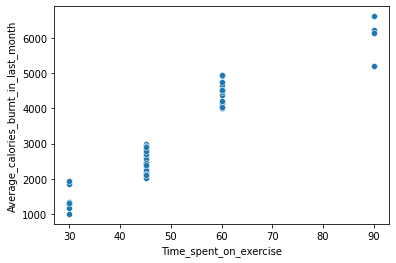

In [ ]:
# Correlation Matrix
sns.scatterplot(x='Time_spent_on_exercise', y='Average_calories_burnt_in_last_month',data=train)

In [ ]:
train.corr()

,Time spent on exercise,Average calories burnt in last month
Time spent on exercise,1.00000,0.94617
Average calories burnt in last month,0.94617,1.00000


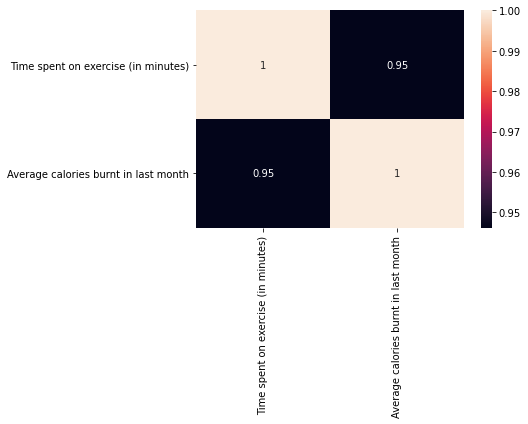

In [ ]:
sns.heatmap(train.corr(),annot = True)

In [ ]:
# Model Building
reg = smf.ols('Time_spent_on_exercise ~ Average_calories_burnt_in_last_month', data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Time_spent_on_exercise   R-squared:                       0.895
Model:                                OLS   Adj. R-squared:                  0.893
Method:                     Least Squares   F-statistic:                     410.2
Date:                    Mon, 10 May 2021   Prob (F-statistic):           3.69e-25
Time:                            13:28:44   Log-Likelihood:                -150.11
No. Observations:                      50   AIC:                             304.2
Df Residuals:                          48   BIC:                             308.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               17.4077      1.829      9.519      0.000      13.731      21.085
Average_calories_burnt_in_last_month     0.0104      0.001     20.253      0.000       0.009       0.011
==============================================================================
Omnibus:                       13.303   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.828
Skew:                           0.884   Prob(JB):                     0.000135
Kurtosis:                       5.330   Cond. No.                     9.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

17.8757

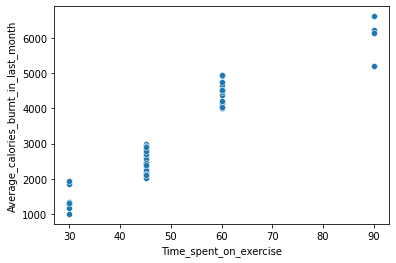

In [ ]:
# Assumption of Model
## Linearity
sns.scatterplot(x='Time_spent_on_exercise', y='Average_calories_burnt_in_last_month',data=train)
train['fitted_value']=reg.fittedvalues
train['residual']=reg.resid
train.head()
y=17.4077+0.0104*45
y

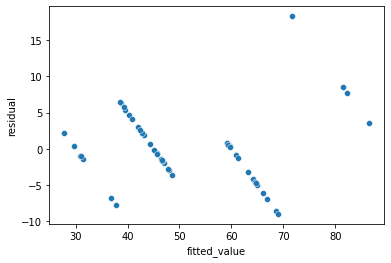

In [ ]:
## Homoscedasicity
sns.scatterplot(x='fitted_value', y='residual',data=train)

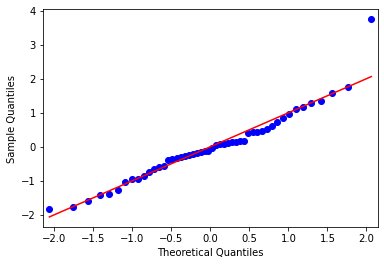

In [ ]:
## Normality
fig = sm.qqplot(train['residual'], fit=True, line='s') 
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


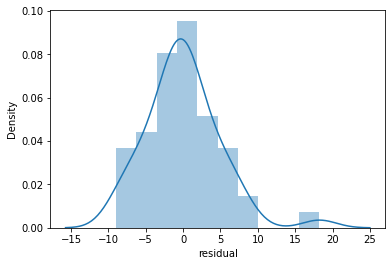

In [ ]:
# Model errors
ax = sns.distplot(train.residual)

In [ ]:
# Prediction on data
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Time_spent_on_exercise   R-squared:                       0.895
Model:                                OLS   Adj. R-squared:                  0.893
Method:                     Least Squares   F-statistic:                     410.2
Date:                    Mon, 10 May 2021   Prob (F-statistic):           3.69e-25
Time:                            13:45:20   Log-Likelihood:                -150.11
No. Observations:                      50   AIC:                             304.2
Df Residuals:                          48   BIC:                             308.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               17.4077      1.829      9.519      0.000      13.731      21.085
Average_calories_burnt_in_last_month     0.0104      0.001     20.253      0.000       0.009       0.011
==============================================================================
Omnibus:                       13.303   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.828
Skew:                           0.884   Prob(JB):                     0.000135
Kurtosis:                       5.330   Cond. No.                     9.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Time_spent_on_exercise,Average_calories_burnt_in_last_month
114,30,1074
19,30,1618
57,45,2465
51,60,4376
53,60,4522


In [ ]:
y=17.4077+0.0104*30
y

17.7197

In [ ]:
test['Predicted']=reg.predict(test)
test.head()

,Time_spent_on_exercise,Average_calories_burnt_in_last_month,Predicted
114,30,1074,28.609813
19,30,1618,34.283879
57,45,2465,43.118315
51,60,4376,63.050556
53,60,4522,64.573375


In [ ]:
# MSE and RMSE on train data model
model_mse = mean_squared_error(train['Time_spent_on_exercise'],train['fitted_value'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 4.87


In [ ]:
# MSE and RMSE on test data model
model_mse = mean_squared_error(test['Time_spent_on_exercise'],test['Predicted'])
model_rmse = math.sqrt(model_mse)
print("RMSE {:.3}".format(model_rmse))

RMSE 5.44
